In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import warnings


### Data Preprocessing

In [95]:
data = pd.read_csv("spotify.csv", sep=',')
data_cleaned = data.dropna(subset=['track_id','track_name','track_artist','track_album_name'],axis=0)
data_cleaned = data.drop(['track_id'],axis=1)  #not much useful
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.reset_index(drop=True,inplace=True)
data_cleaned.head()

track_name      track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                    Memories - Dillon Francis Remix          Maroon 5   
2                    All the Time - Don Diablo Remix      Zara Larsson   
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers   
4            Someone You Loved - Future Humans Remix     Lewis Capaldi   

   track_popularity          track_album_id  \
0                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                67  63rPSO264uRjW1X5E6cWv6   
2                70  1HoSmj2eLcsrR0vE9gThr4   
3                60  1nqYsOef1yKKuGOVchbsk6   
4                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  ...  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  ...   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  ...   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  ...   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  ...   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  ...   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    6    -2.634     1       0.0583        0.1020          0.000000    0.0653   
1   11    -4.969     1       0.0373        0.0724          0.004210    0.3570   
2    1    -3.432     0       0.0742        0.0794          0.000023    0.1100   
3    7    -3.778     1       0.1020        0.0287          0.000009    0.2040   
4    1    -4.672     1       0.0359        0.0803          0.000000    0.0833   

   valence    tempo  duration_ms  
0    0.518  122.036       194754  
1    0.693   99.972       162600  
2    0.613  124.008       176616  
3    0.277  121.956       169093  
4    0.725  123.976       189052  

[5 rows x 22 columns]

In [96]:
data_cleaned.isnull().sum()

track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [75]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                32828 non-null  object 
 1   track_artist              32828 non-null  object 
 2   track_popularity          32833 non-null  int64  
 3   track_album_id            32833 non-null  object 
 4   track_album_name          32828 non-null  object 
 5   track_album_release_date  32833 non-null  object 
 6   playlist_name             32833 non-null  object 
 7   playlist_id               32833 non-null  object 
 8   playlist_genre            32833 non-null  object 
 9   playlist_subgenre         32833 non-null  object 
 10  danceability              32833 non-null  float64
 11  energy                    32833 non-null  float64
 12  key                       32833 non-null  int64  
 13  loudness                  32833 non-null  float64
 14  mode  

In [68]:
data_cleaned.nunique()

track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
dtype: int64

In [98]:
data_cleaned.describe().transpose()

count           mean           std          min  \
track_popularity  32833.0      42.477081     24.984074     0.000000   
danceability      32833.0       0.654850      0.145085     0.000000   
energy            32833.0       0.698619      0.180910     0.000175   
key               32833.0       5.374471      3.611657     0.000000   
loudness          32833.0      -6.719499      2.988436   -46.448000   
mode              32833.0       0.565711      0.495671     0.000000   
speechiness       32833.0       0.107068      0.101314     0.000000   
acousticness      32833.0       0.175334      0.219633     0.000000   
instrumentalness  32833.0       0.084747      0.224230     0.000000   
liveness          32833.0       0.190176      0.154317     0.000000   
valence           32833.0       0.510561      0.233146     0.000000   
tempo             32833.0     120.881132     26.903624     0.000000   
duration_ms       32833.0  225799.811622  59834.006182  4000.000000   

                          25%            50%           75%         max  
track_popularity      24.0000      45.000000      62.00000     100.000  
danceability           0.5630       0.672000       0.76100       0.983  
energy                 0.5810       0.721000       0.84000       1.000  
key                    2.0000       6.000000       9.00000      11.000  
loudness              -8.1710      -6.166000      -4.64500       1.275  
mode                   0.0000       1.000000       1.00000       1.000  
speechiness            0.0410       0.062500       0.13200       0.918  
acousticness           0.0151       0.080400       0.25500       0.994  
instrumentalness       0.0000       0.000016       0.00483       0.994  
liveness               0.0927       0.127000       0.24800       0.996  
valence                0.3310       0.512000       0.69300       0.991  
tempo                 99.9600     121.984000     133.91800     239.440  
duration_ms       187819.0000  216000.000000  253585.00000  517810.000

In [25]:
numerical_features = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
data_cleaned[numerical_features]

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726   0.815    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32823         0.428   0.922    -1.814       0.0936      0.076600   
32824         0.522   0.786    -4.462       0.0420      0.001710   
32825         0.529   0.821    -4.899       0.0481      0.108000   
32826         0.626   0.888    -3.361       0.1090      0.007920   
32827         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  
0              0.000000    0.0653   0.5180  122.036       194754  
1              0.004210    0.3570   0.6930   99.972       162600  
2              0.000023    0.1100   0.6130  124.008       176616  
3              0.000009    0.2040   0.2770  121.956       169093  
4              0.000000    0.0833   0.7250  123.976       189052  
...                 ...       ...      ...      ...          ...  
32823          0.000000    0.0668   0.2100  128.170       204375  
32824          0.004270    0.3750   0.4000  128.041       353120  
32825          0.000001    0.1500   0.4360  127.989       210112  
32826          0.127000    0.3430   0.3080  128.008       367432  
32827          0.341000    0.7420   0.0894  127.984       337500  

[32828 rows x 10 columns]

In [60]:
scaler = StandardScaler()
warnings.filterwarnings('ignore')
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

### Data Visualization

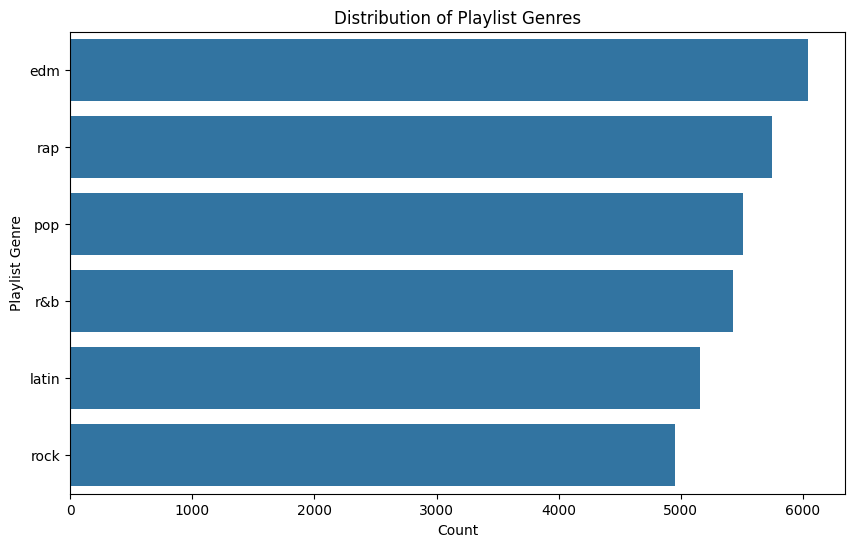

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(y='playlist_genre',data=data_cleaned,order=data_cleaned['playlist_genre'].value_counts().index) 
plt.title("Distribution of Playlist Genres")
plt.xlabel("Count")
plt.ylabel("Playlist Genre")
plt.show()

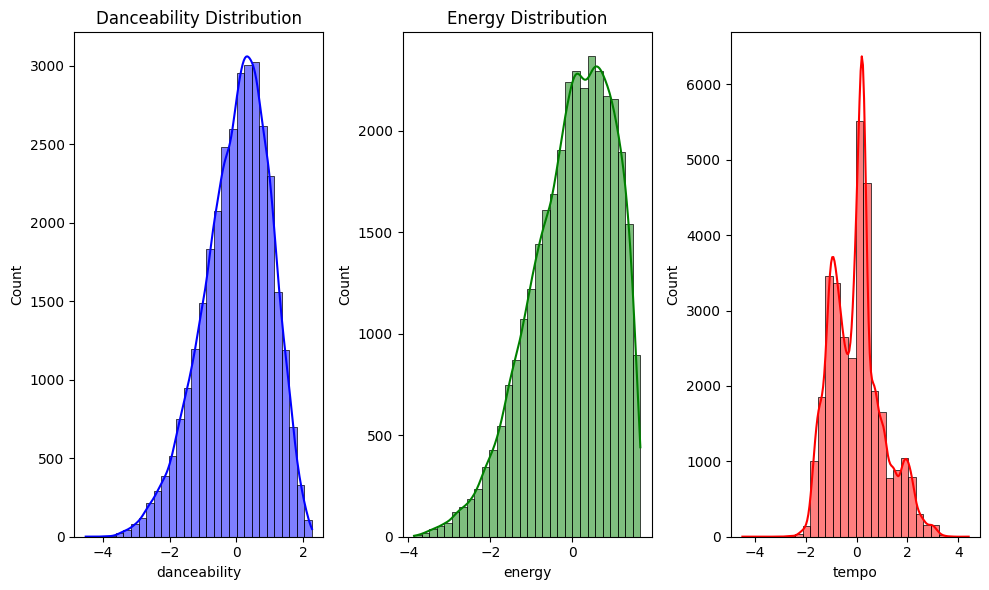

In [42]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(data_cleaned['danceability'],kde=True,bins=30,color='blue')
plt.title('Danceability Distribution')

plt.subplot(1,3,2)
sns.histplot(data_cleaned['energy'],kde=True,bins=30,color='green')
plt.title('Energy Distribution')

plt.subplot(1,3,3)
sns.histplot(data_cleaned['tempo'],kde=True,bins=30,color='red')

plt.tight_layout()
plt.show()

### Correlation Matrix

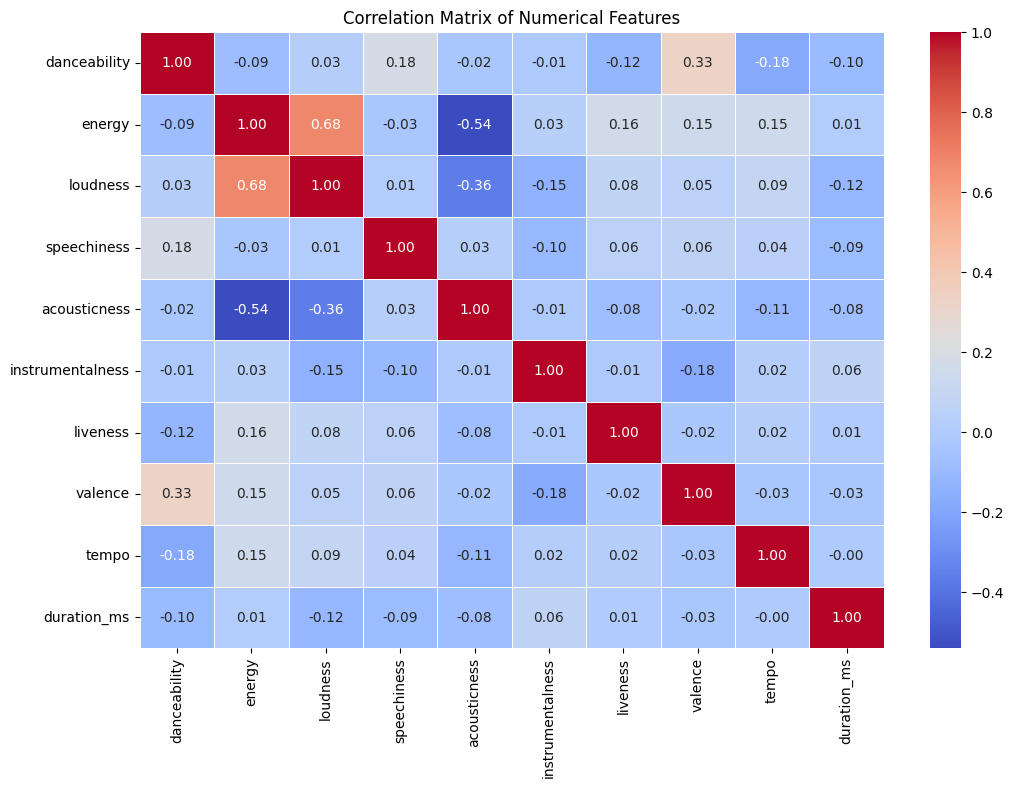

In [44]:
plt.figure(figsize=(12,8))
correlation_matrix = data_cleaned[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [71]:
X = data_cleaned[numerical_features]
y = data_cleaned["playlist_genre"]

In [72]:
y.unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

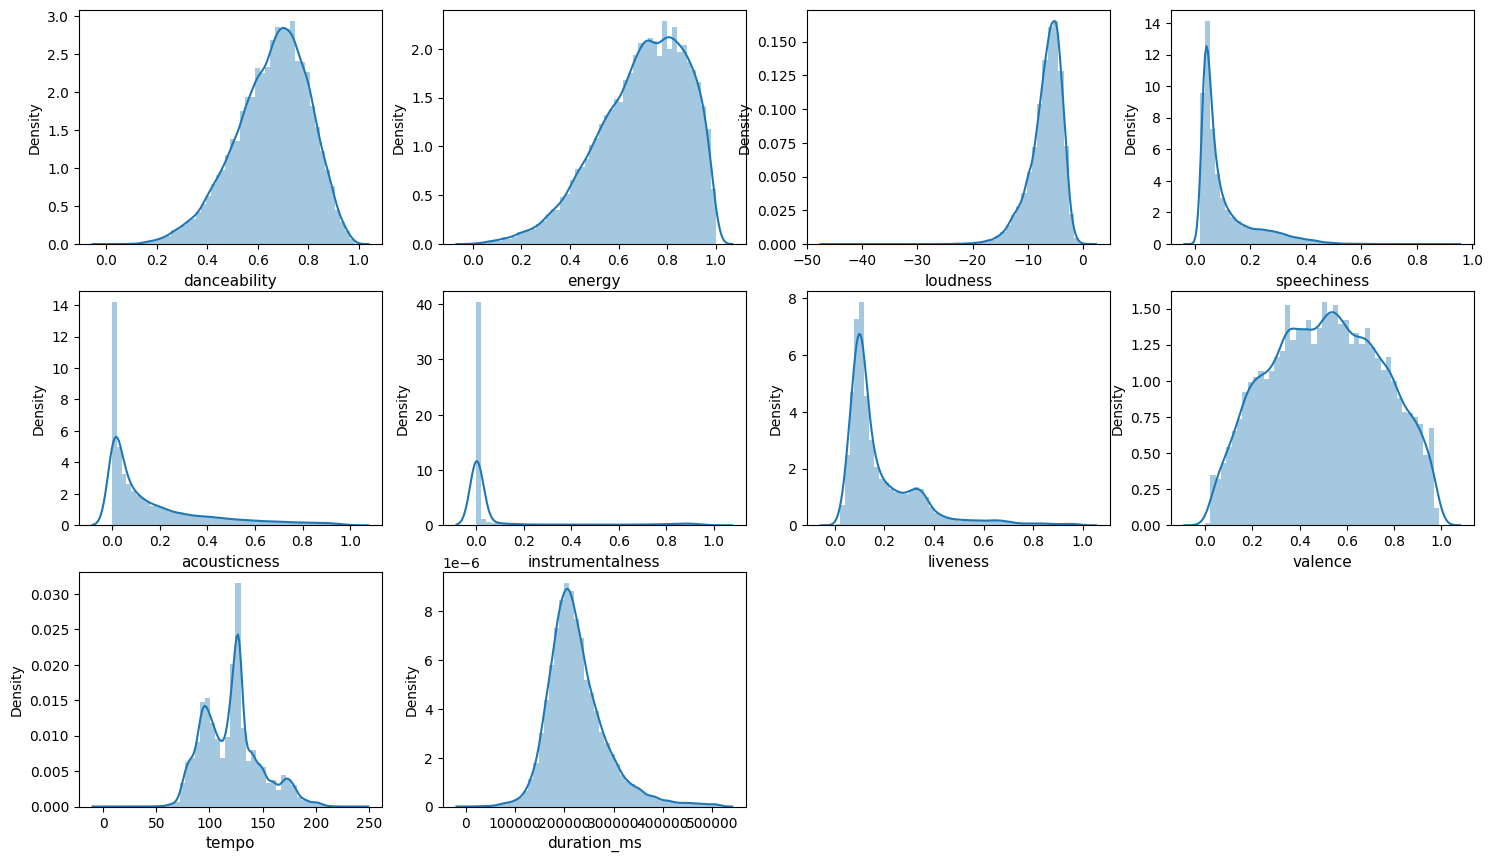

In [73]:
k=0
plt.figure(figsize = (18,14))
for i in X.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(X[i])
    plt.xlabel(i, fontsize=11)
    k +=1

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

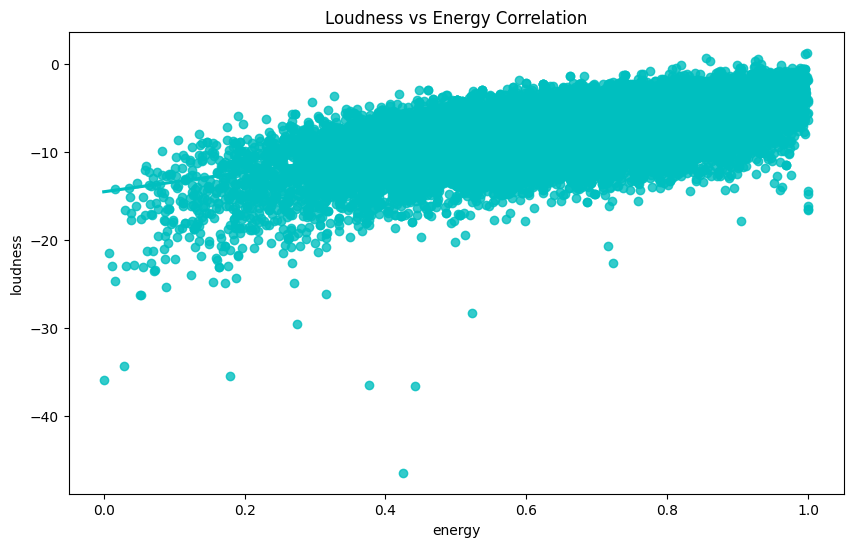

In [100]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_cleaned,y='loudness',x='energy',color='c').set(title='Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

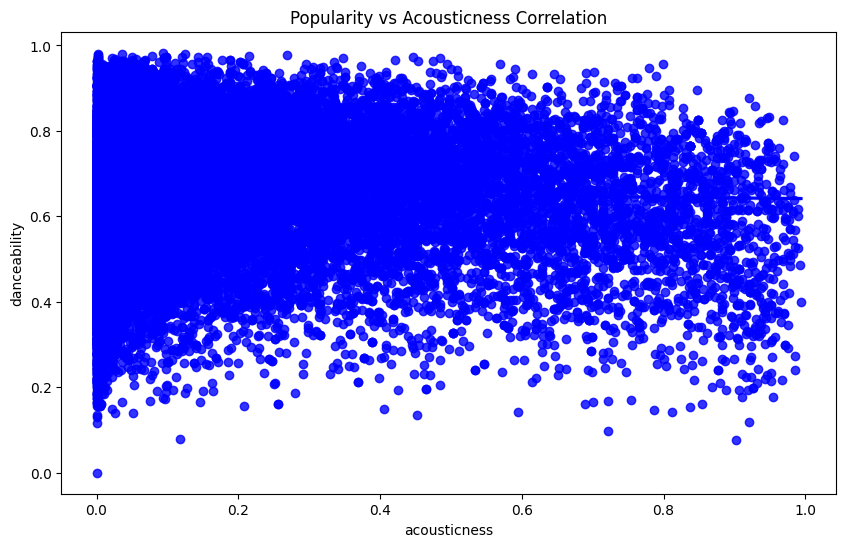

In [102]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_cleaned, y='danceability', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')

In [105]:
# data_cleaned['track_album_release_date']=data_cleaned.index.get_level_values('release_date')
# data_cleaned.track_album_release_date=pd.to_datetime(data_cleaned.track_album_release_date)
# years=data_cleaned.track_album_release_date.dt.year

### KMeans Clustering

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [85]:
y_train

12593     rock
791        pop
25523      r&b
31510      edm
10241      rap
         ...  
16850    latin
6265       rap
11284     rock
860        pop
15795     rock
Name: playlist_genre, Length: 26266, dtype: object

In [87]:
y_pred_knn = knn_model.predict_proba(X_test)

In [90]:
kmeans = KMeans(n_clusters=5,random_state=42)
warnings.filterwarnings('ignore')
data_cleaned['cluster'] = kmeans.fit_predict(data_cleaned[numerical_features])

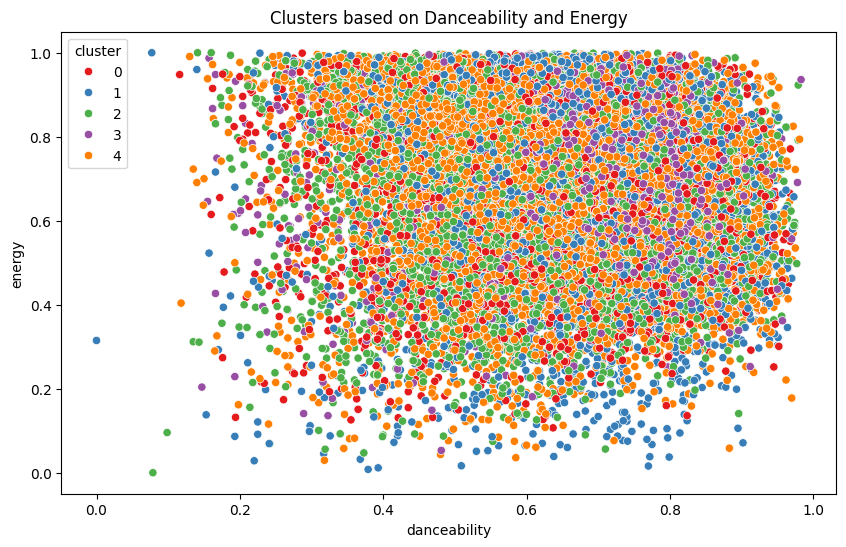

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='danceability', y='energy', hue='cluster',palette='Set1',data=data_cleaned)
plt.title("Clusters based on Danceability and Energy")
plt.show()

In [112]:
from sklearn.pipeline import Pipeline
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data_cleaned['cluster_label'] = song_cluster_labels

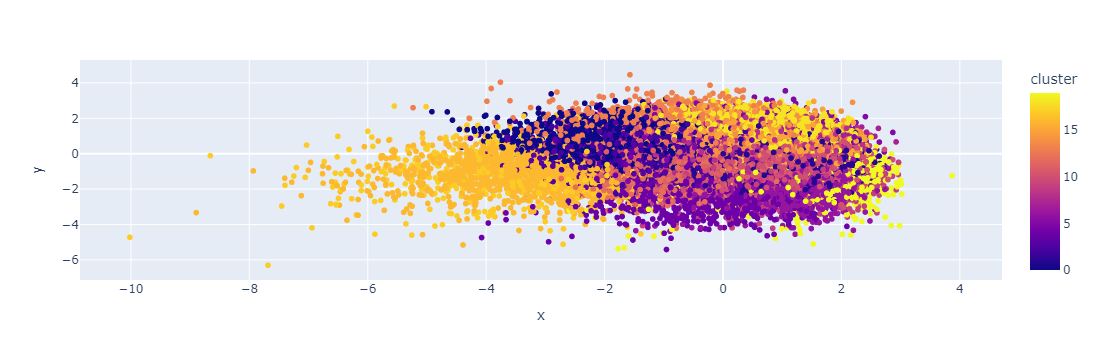

In [113]:
# Visualizing the Clusters with PCA
import plotly.express as px
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data_cleaned['track_name']
projection['cluster'] = data_cleaned['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()


### Basic Recommendation System

In [53]:
X = data_cleaned[numerical_features]

In [54]:
model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
model.fit(X)

NearestNeighbors(algorithm='ball_tree')

In [62]:
random_track_idx = np.random.choice(data_cleaned.index)
random_track = data_cleaned.iloc[random_track_idx]
warnings.filterwarnings('ignore')
distances, indices = model.kneighbors([random_track[numerical_features]])

In [56]:
print(f"Recommendations for track: {random_track['track_name']} by {random_track['track_artist']}")
for idx in indices[0]:
    recommended_track = data_cleaned.iloc[idx]
    print(f"Recommended: {recommended_track['track_name']} by {recommended_track['track_artist']}")

Recommendations for track: Instagram - R3HAB Remix by Dimitri Vegas & Like Mike
Recommended: Instagram - R3HAB Remix by Dimitri Vegas & Like Mike
Recommended: Instagram - R3HAB Remix by Dimitri Vegas & Like Mike
Recommended: Strong by R3HAB
Recommended: Strong by R3HAB
Recommended: I'm Shipping Up To Boston by Dropkick Murphys
